# Data visualisation élémentaire en Python

Dans ce notebook, nous allons découvrir, pas à pas, différentes manières de visualiser des données en Python. Pour cela, nous allons faire appel à diverses bibliothèques : pandas, numpy, matplotlib, seaborn.

## Données

In [1]:
import pandas as pd

### Iris

Le jeu de données "Iris" contient des informations sur des iris (les plantes), réparties en 3 classes de 50 instances, 1 classe est linéairement séparable des autres, les 2 autres ne le sont pas. Voici la page décrivant les données : https://archive.ics.uci.edu/ml/datasets/iris

In [2]:
import os

# Crée un dossier data
dossier_tp = "data"

In [3]:
fichier = "iris.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/" + fichier
# url = "http://cedric.cnam.fr/vertigo/Cours/RCP216/docs/tpdataviz/" + fichier est possible aussi, mais iris.csv

if not os.path.exists(dossier_tp + "/" + fichier):
  os.system("mkdir -p " + dossier_tp)

  # Télécharge les données
  sortie = "téléchargement OK" if os.system("wget -q -nc " + url + "-P" + dossier_tp) == 0 else "problème avec le téléchargement des fichiers"
  print(sortie)
else:
  print("fichiers de données présents dans " + dossier_tp)

fichiers de données présents dans data


In [4]:
iris = pd.read_csv(dossier_tp+"/"+'iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
len(iris)

150

### WineReviews

Le jeu de données "Wine Reviews" contient des données sur des vins, c'est-à-dire des caractéristiques (pays d'origine, prix) mais aussi des appréciations par des personnes. La source des données est ici : https://www.kaggle.com/datasets/zynicide/wine-reviews

In [6]:
fichier = "winemag-data-25k.csv"
url = "http://raphael.fournier-sniehotta.fr/files/2526-python-intro/data/" + fichier

if not os.path.exists(dossier_tp + "/" + fichier):
  os.system("mkdir -p " + dossier_tp)

  # Télécharge les données
  sortie = "téléchargement OK" if os.system("wget -q -nc " + url + " -P " + dossier_tp) == 0 else "problème avec le téléchargement des fichiers"
  print(sortie)
else:
  print("fichiers de données présents dans " + dossier_tp)

fichiers de données présents dans data


In [7]:
wine_reviews = pd.read_csv(dossier_tp + "/" + fichier, index_col=0)
wine_reviews.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

## La bibliothèque Matplotlib

In [8]:
import matplotlib.pyplot as plt

### Nuage de points (scatter plot)

Créons le nuage de points affichant, pour une dimension la longueur du [sépale](https://fr.wikipedia.org/wiki/S%C3%A9pale), et pour l'autre dimension, la largeur de celui-ci.

Text(0, 0.5, 'sepal_width')

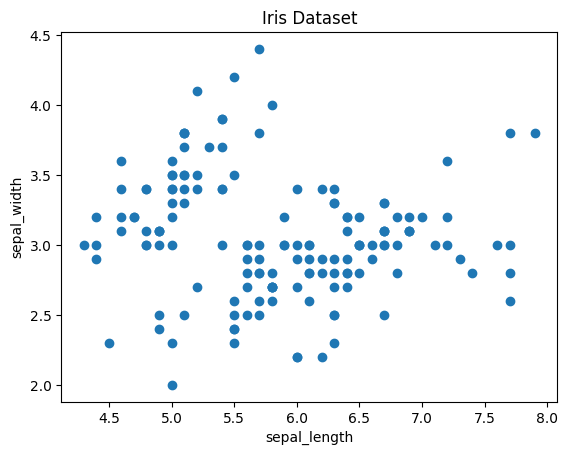

In [9]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Voyons maintenant ce nuage, avec des couleurs correspondant à chaque classe.

Text(0, 0.5, 'sepal_width')

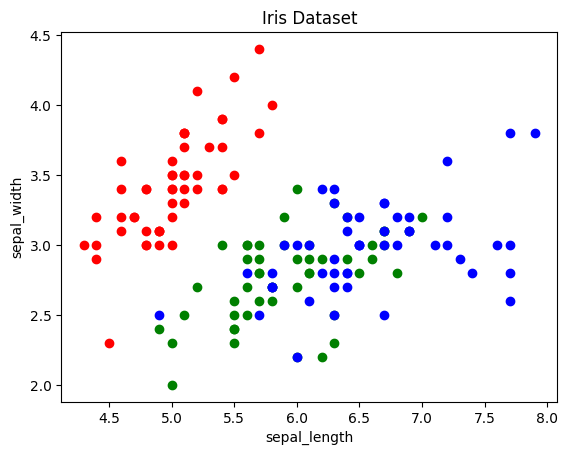

In [10]:
# create color dictionary
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

Qu'observez-vous ?

On remarque ce qui était dit au début : une classe est visiblement linéairement séparable des autres.

### Courbes (Line chart)

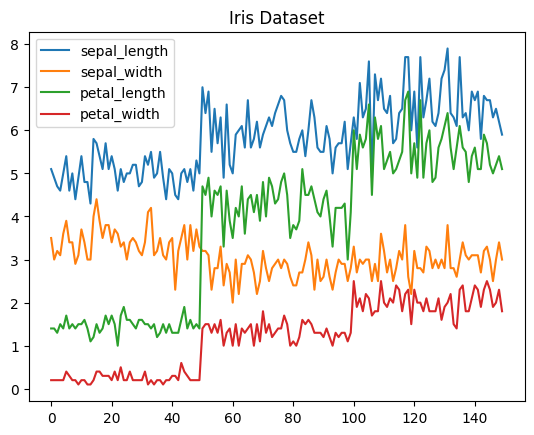

In [11]:
# get columns to plot
columns = iris.columns.drop(['class'])
# create x data
x_data = range(0, iris.shape[0]) # longueur de iris
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, iris[column], label = column)
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()


Qu'affiche-t-on avec ce diagramme ? Quel sens cela a-t-il ?

Ce n'est pas un très bon exemple de visualisation ici, puisqu'on utilise une visualisation avec une ligne continue pour des instances différentes de fleurs !

### Histogramme

Affichons les scores (points) des vins.

Text(0, 0.5, 'Frequency')

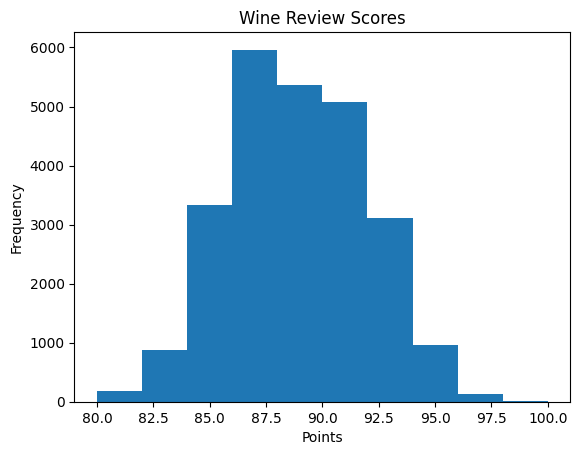

In [12]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(wine_reviews['points'])
# set title and labels
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Histogrammes (Bar chart)

Text(0, 0.5, 'Frequency')

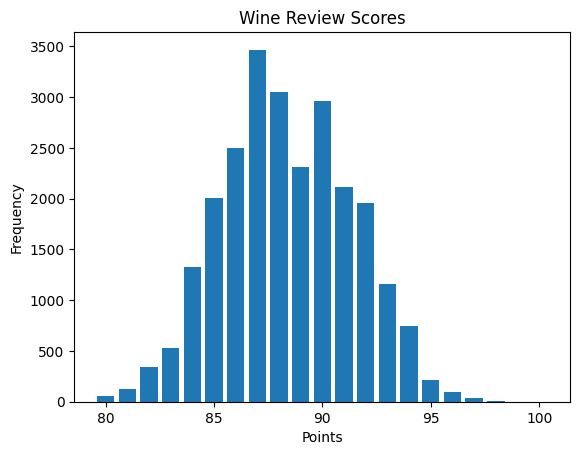

In [13]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = wine_reviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Wine Review Scores') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

## La bibliothèque Seaborn

Seaborn a des "paramètres par défaut" qui rendent les graphiques plus jolis.

In [14]:
import seaborn as sns
sns.set_theme()

### Scatter plot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

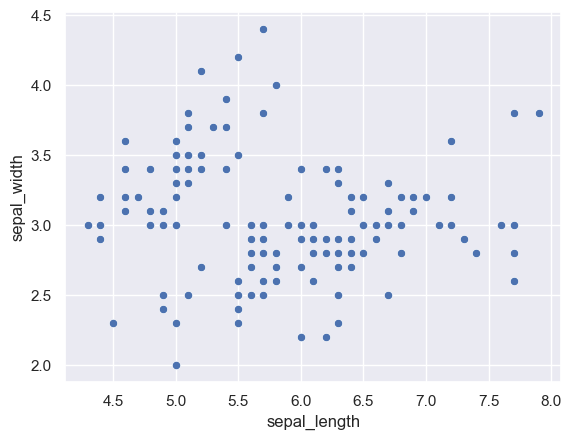

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

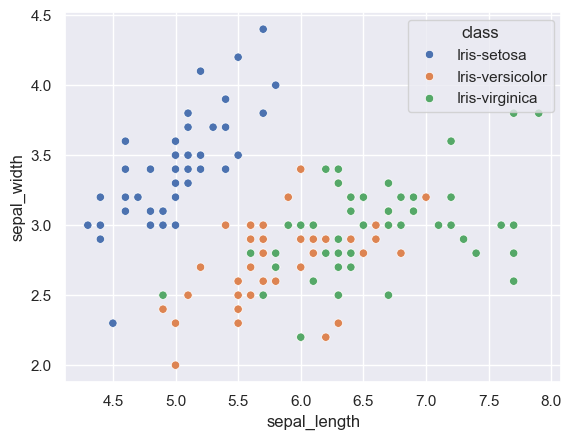

In [16]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Line chart

<Axes: >

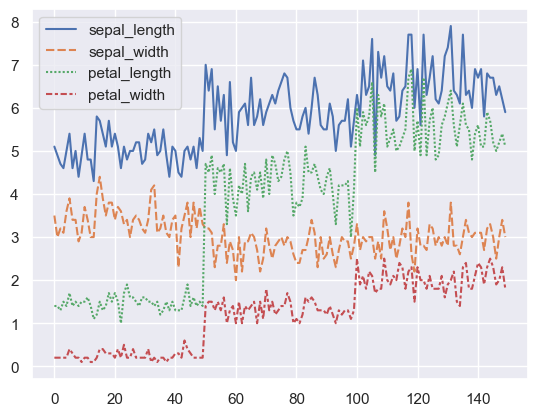

In [17]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Histogramme

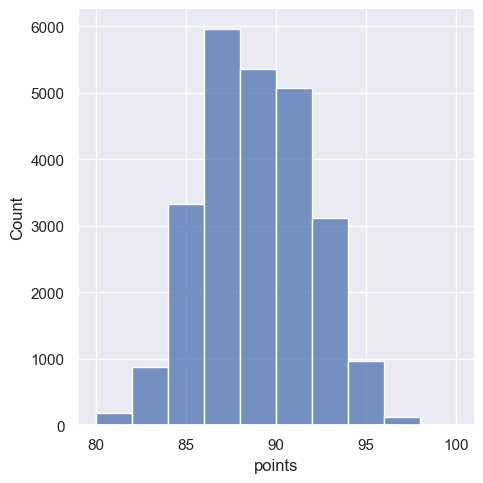

In [18]:
sns.displot(wine_reviews['points'], bins=10, kde=False)

<Axes: xlabel='points', ylabel='Count'>

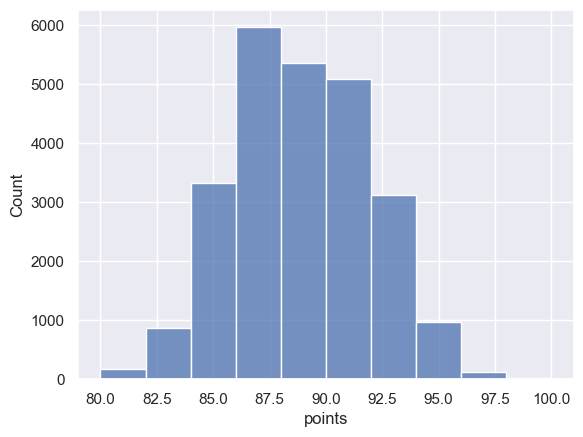

In [19]:
sns.histplot(wine_reviews['points'], bins=10, kde=False)

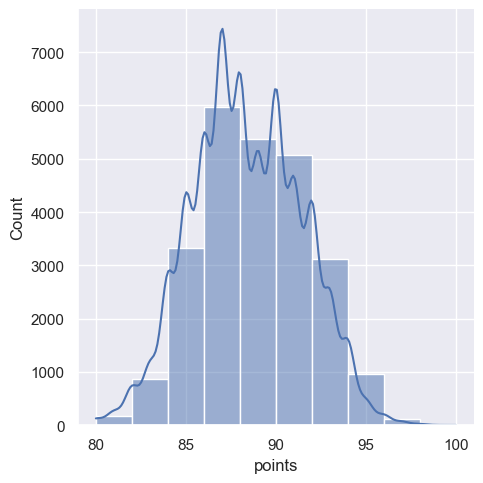

In [20]:
sns.displot(wine_reviews['points'], bins=10, kde=True)

### Bar chart

<Axes: xlabel='points', ylabel='count'>

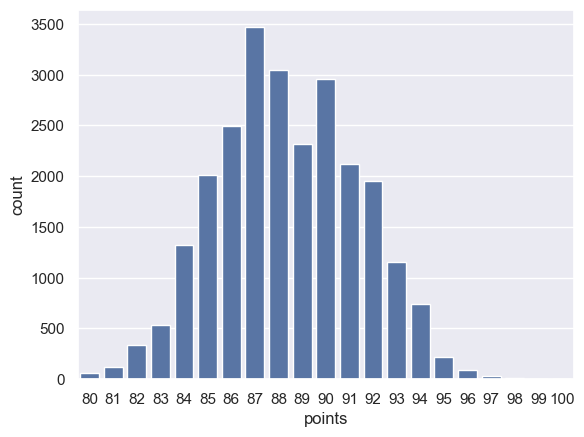

In [21]:
sns.countplot(x=wine_reviews['points'])

### Box plot (summary)

Pour "résumer" des jeux de données, on utilise parfois la notion de "7-numbers Summary" : https://en.wikipedia.org/wiki/Seven-number_summary

<Axes: xlabel='points', ylabel='price'>

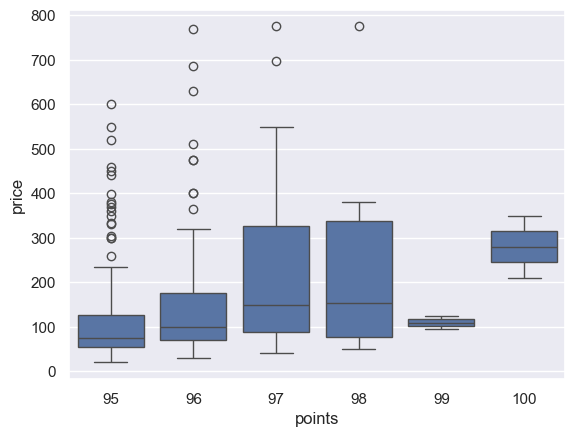

In [22]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot(x='points', y='price', data=df)

## Quelques techniques avancées

### Heatmap

Matplotlib

[None, None, None, None, None, None, None, None, None, None, None, None]

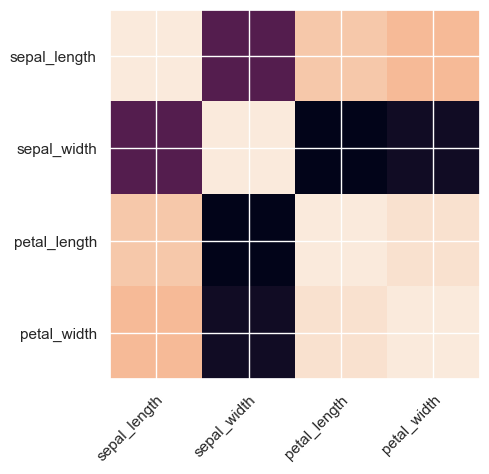

In [23]:
import numpy as np
# get correlation matrix
corr = iris.corr(numeric_only=True)
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

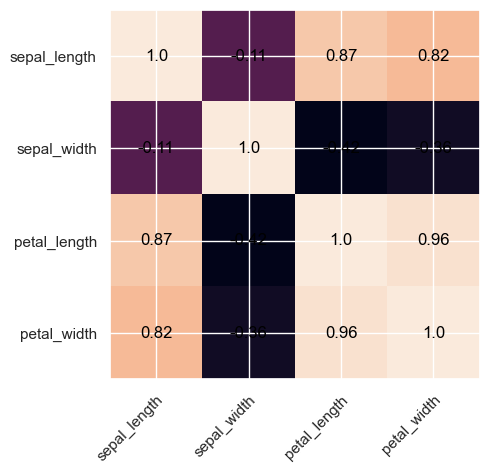

In [24]:
# get correlation matrix
corr = iris.corr(numeric_only=True)
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
ha="center", va="center", color="black")

<Axes: >

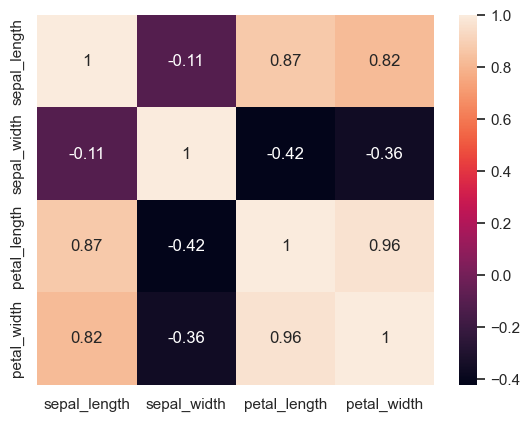

In [25]:
sns.heatmap(iris.corr(numeric_only=True), annot=True)

### Faceting

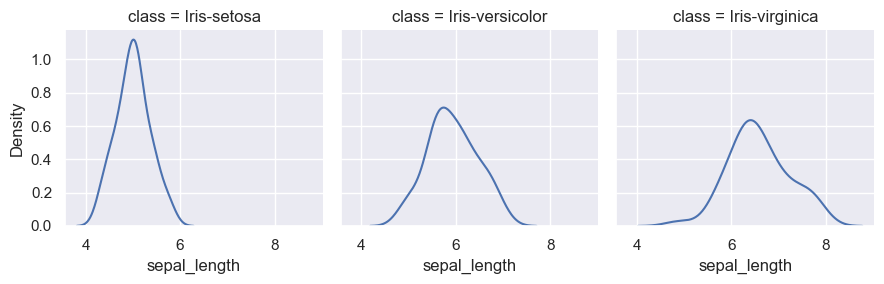

In [26]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

### Pair plot

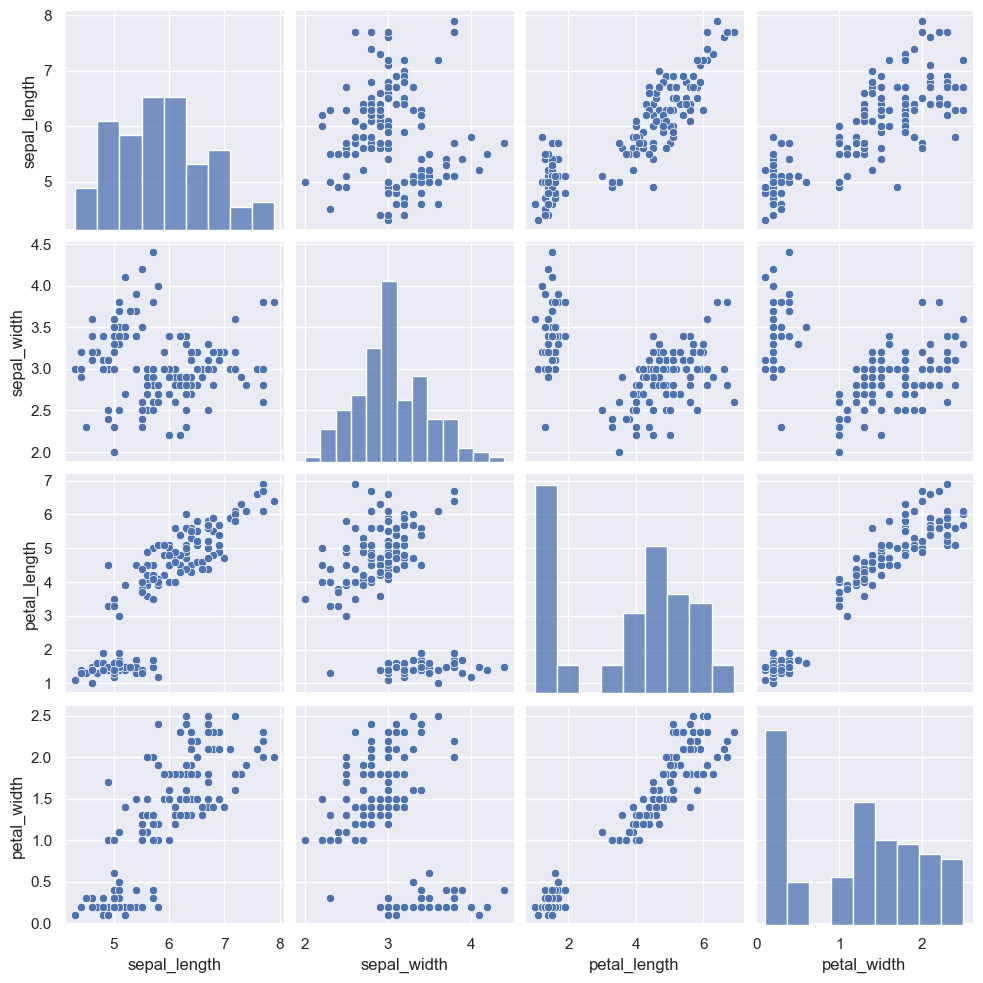

In [27]:
sns.pairplot(iris)

# Analyse de données de marathon

Le jeu de données "marathon" contient des informations sur les temps de parcours des participants à un marathon (temps de passage à mi-parcours et temps total), ainsi que leur âge, genre

Chargez le dataset dans un dataframe pandas, et affichez les premières lignes.

In [28]:
fichier = "marathon-data.csv"
url = "http://raphael.fournier-sniehotta.fr/files/2526-python-intro/data/" + fichier

if not os.path.exists(dossier_tp + "/" + fichier):
  os.system("mkdir -p " + dossier_tp)

  # Télécharge les données
  sortie = "téléchargement OK" if os.system("wget -q -nc " + url + " -P " + dossier_tp) == 0 else "problème avec le téléchargement des fichiers"
  print(sortie)
else:
  print("fichiers de données présents dans " + dossier_tp)

fichiers de données présents dans data


In [29]:
data = pd.read_csv(dossier_tp + "/" + fichier)
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

Vérifiez les types, avec "dtypes".

In [30]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Pour manipuler plus facilement les temps nous allons les convertir.

In [31]:
import datetime
from datetime import timedelta

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [32]:
data = pd.read_csv(dossier_tp + "/" +'marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

age gender           split           final
0   33      M 0 days 01:05:38 0 days 02:08:51
1   32      M 0 days 01:06:26 0 days 02:09:28
2   31      M 0 days 01:06:49 0 days 02:10:42
3   38      M 0 days 01:06:16 0 days 02:13:45
4   31      M 0 days 01:06:32 0 days 02:13:59

In [33]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [34]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

age gender           split           final  split_sec  final_sec
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0

In [35]:
data.tail

<bound method NDFrame.tail of        age gender           split           final  split_sec  final_sec
0       33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0
1       32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0
2       31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0
3       38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0
4       31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0
...    ...    ...             ...             ...        ...        ...
37245   18      M 0 days 04:24:24 0 days 09:32:57    15864.0    34377.0
37246   36      M 0 days 04:35:43 0 days 09:33:28    16543.0    34408.0
37247   51      M 0 days 04:22:35 0 days 09:33:40    15755.0    34420.0
37248   55      W 0 days 04:58:06 0 days 10:00:40    17886.0    36040.0
37249   58      W 0 days 04:59:49 0 days 10:01:08    17989.0    36068.0

[37250 rows x 6 columns]>

## Quelques statistiques descriptives

Essayez d'afficher les distributions suivantes :
- âges
- âges, par genre
- temps de parcours, par genre

Optionnel :
- temps intermédiaires
- détails autour de certains "temps" (3h, 3h30, 4h)

Distribution des âges des coureurs et coureuses

<Axes: xlabel='age', ylabel='Count'>

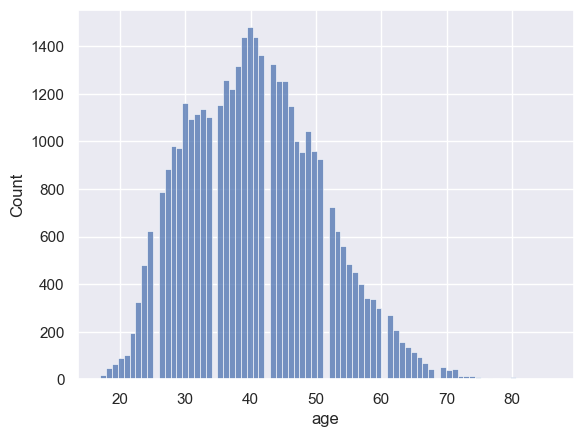

In [36]:
sns.histplot(data['age'], kde=False)

Distribution des âges, par genre

(15.0, 85.0)

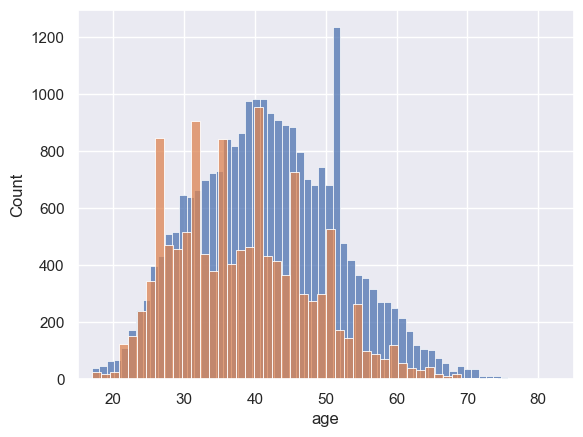

In [37]:
fig, ax = plt.subplots()
for gender in ["M", "W"]:
    sns.histplot(data[data.gender == gender]['age'], ax=ax, kde=False)
ax.set_xlim([15, 85])

Distribution des temps, selon le genre

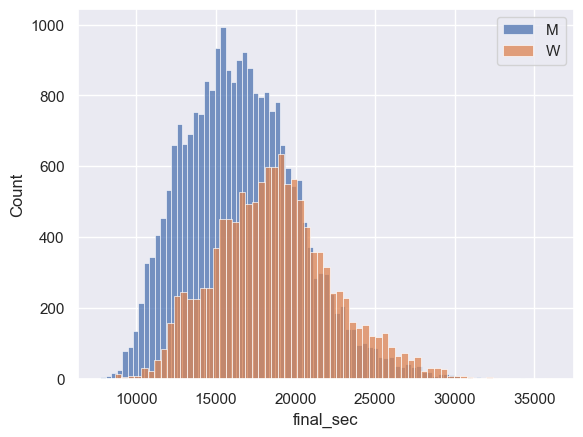

In [38]:
fig, ax = plt.subplots()
for gender in ["M", "W"]:
    sns.histplot(data[data.gender == gender]['final_sec'], ax=ax, kde=False, label=gender)
plt.legend()

Temps finaux, en fonction de l'âge

/home/raph/Enseignement/Redémarrage-25-26/Seances/Jour1/notebooks/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/raph/Enseignement/Redémarrage-25-26/Seances/Jour1/notebooks/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/raph/Enseignement/Redémarrage-25-26/Seances/Jour1/notebooks/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/raph/Enseignement/Redémarrage-25-26/Seances/Jour1/notebooks/venv/lib/python3.13/site-packages/seaborn/axis

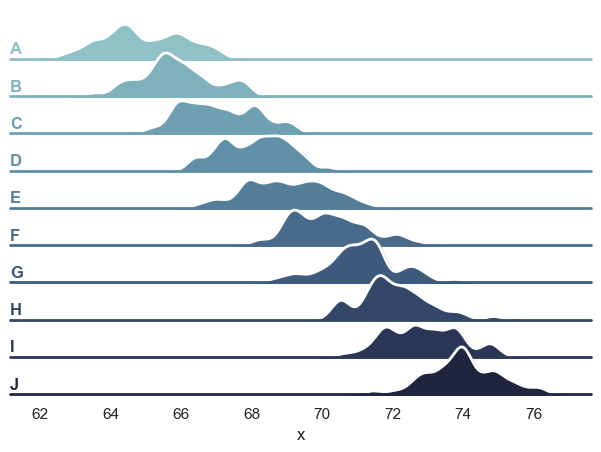

In [39]:
import numpy as np
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [40]:
#df[df.g == "A"].head()
df.head()

x  g
0  64.038123  A
1  66.147050  B
2  66.370011  C
3  68.791019  D
4  70.583534  E

In [41]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
age_groups = pd.cut(data.age, bins)
data['age_group'] = age_groups
groups = data.groupby(by='age_group')
#groups.size()


/tmp/ipykernel_423970/661943606.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = data.groupby(by='age_group')


Autour de 4h

(14100.0, 14700.0)

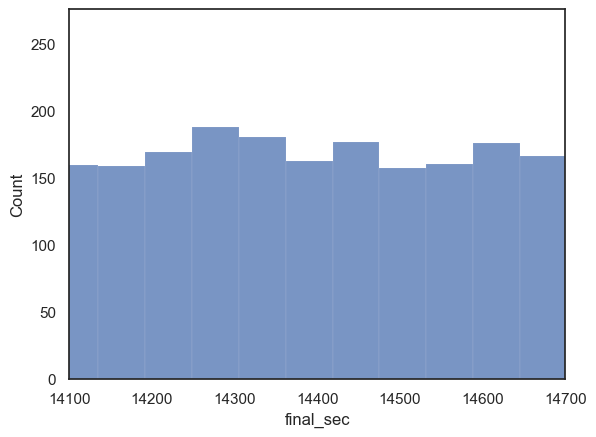

In [42]:
fig, ax = plt.subplots()
sns.histplot(data['final_sec'], bins=500, kde=False)
ax.set_xlim([14400-5*60, 14400+5*60])

## Analyse plus avancée

Comparons les temps intermédiaires et les temps finaux.

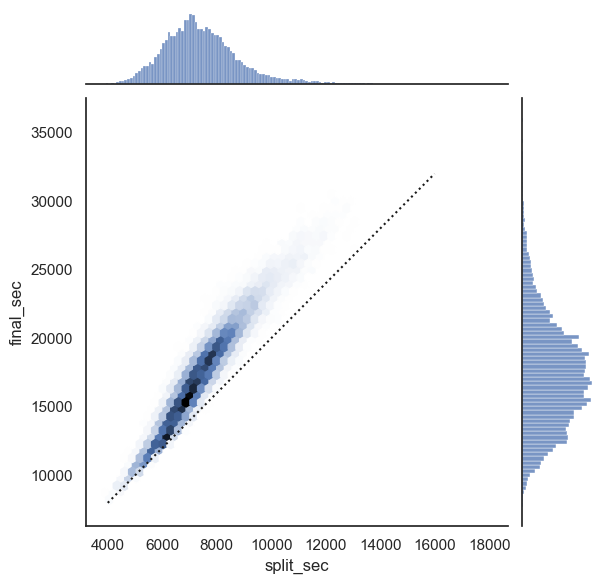

In [43]:
with sns.axes_style('white'):
    g = sns.jointplot(data, x="split_sec", y="final_sec",  kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

Si les coureurs suivaient la ligne diagonale, ils courreraient au même rythme la 1e et la 2e partie de leur parcours. La plupart courrent plus lentement la 2e partie (la fatigue aidant). Pour celles et ceux qui arrivent à courir plus vite, on parle de negative-split. 

On va créer une colonne pour caractériser, dans une fraction, ce negative split (ou positive-split).

In [44]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender           split           final  split_sec  final_sec age_group  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0  (30, 40]   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0  (30, 40]   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0  (30, 40]   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0  (30, 40]   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0  (30, 40]   

   split_frac  
0   -0.018756  
1   -0.026262  
2   -0.022443  
3    0.009097  
4    0.006842

Affichez la distribution de cette fraction. Affichez également une ligne verticale à 0, pour séparer visuellement ceux qui sont en "negative split" de ceux qui sont en positive split.

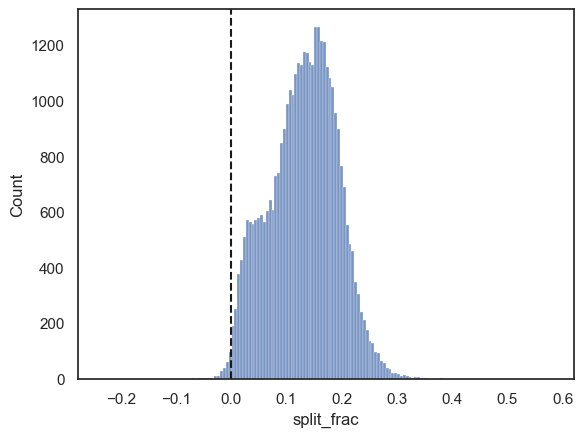

In [45]:
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

Comptez combien de coureurs sont en negative-split.

In [46]:
sum(data.split_frac < 0)

251

Commentez.

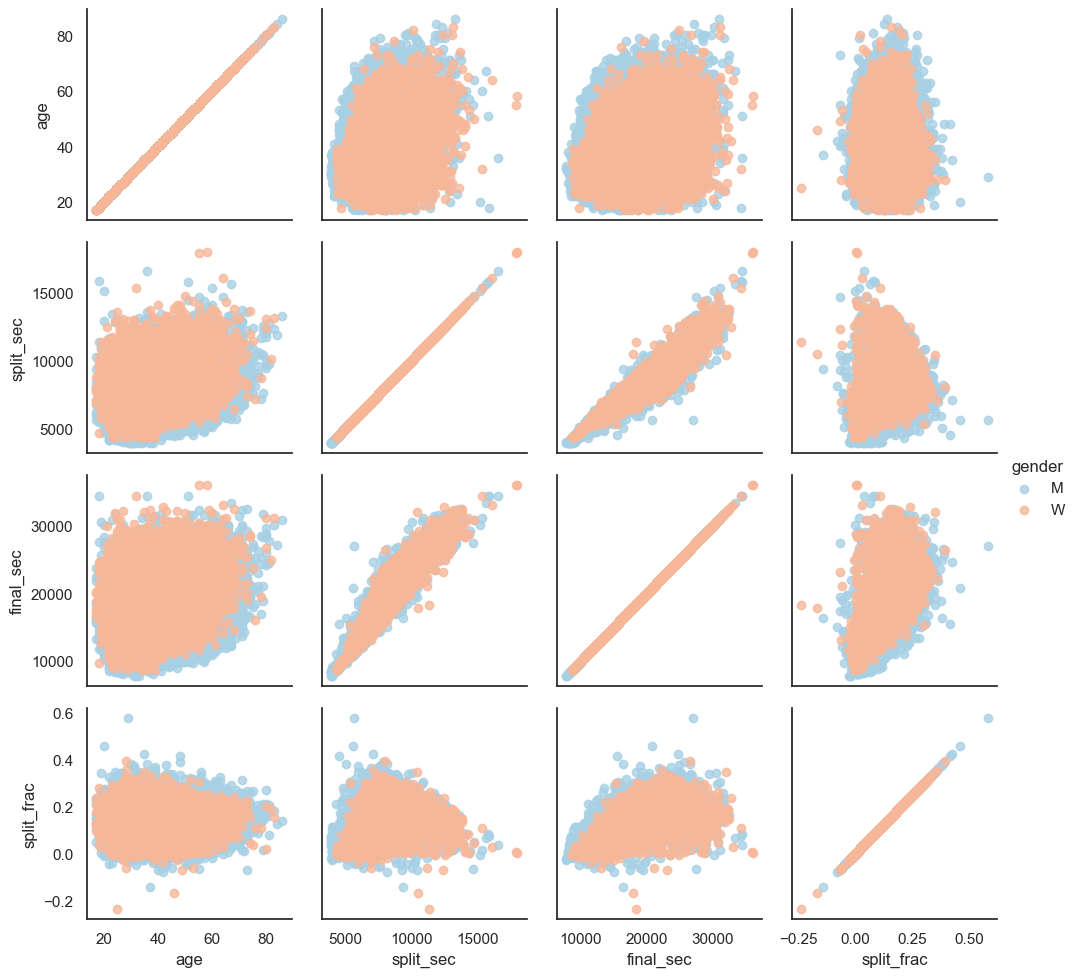

In [47]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Commentez les corrélations.

Regardez les distributions de cette fraction selon le genre et commentez (kdeplot).

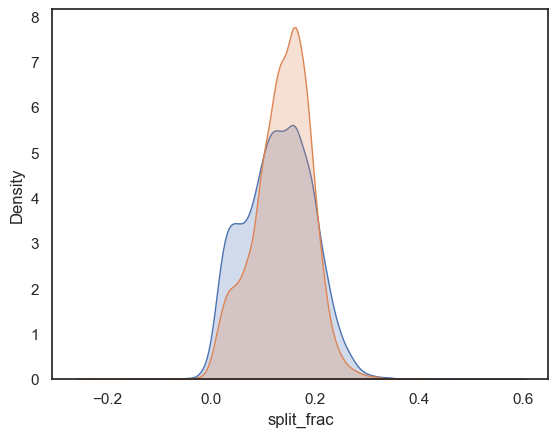

In [48]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

Avec des violinplot, on peut voir les détails de ces distributions. Commentez.

/tmp/ipykernel_423970/2937393740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="split_frac", data=data,


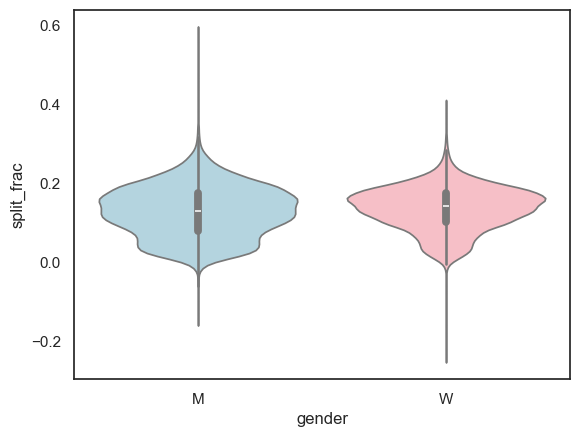

In [49]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

On va regarder les splits avec l'âge.

In [50]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

age gender           split           final  split_sec  final_sec age_group  \
0   33      M 0 days 01:05:38 0 days 02:08:51     3938.0     7731.0  (30, 40]   
1   32      M 0 days 01:06:26 0 days 02:09:28     3986.0     7768.0  (30, 40]   
2   31      M 0 days 01:06:49 0 days 02:10:42     4009.0     7842.0  (30, 40]   
3   38      M 0 days 01:06:16 0 days 02:13:45     3976.0     8025.0  (30, 40]   
4   31      M 0 days 01:06:32 0 days 02:13:59     3992.0     8039.0  (30, 40]   

   split_frac  age_dec  
0   -0.018756       30  
1   -0.026262       30  
2   -0.022443       30  
3    0.009097       30  
4    0.006842       30

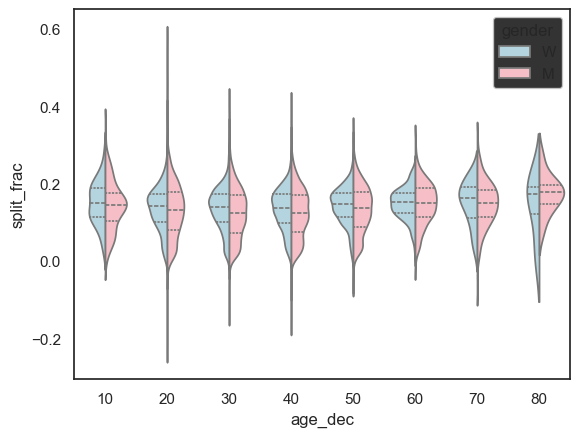

In [51]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

En observant ces données, nous pouvons voir où les distributions des hommes et des femmes diffèrent : les distributions fractionnées des hommes âgés de 20 à 50 ans montrent une surdensité prononcée vers les fractions inférieures par rapport aux femmes du même âge (ou de tout âge, d'ailleurs).


Il est également surprenant de constater que les femmes de 80 ans semblent surpasser tout le monde en termes de temps intermédiaire. Cela s'explique probablement par le fait que nous estimons la distribution à partir d'un petit nombre de données, car il n'y a qu'une poignée de coureurs dans cette tranche d'âge :

In [52]:
(data.age > 80).sum()

np.int64(7)

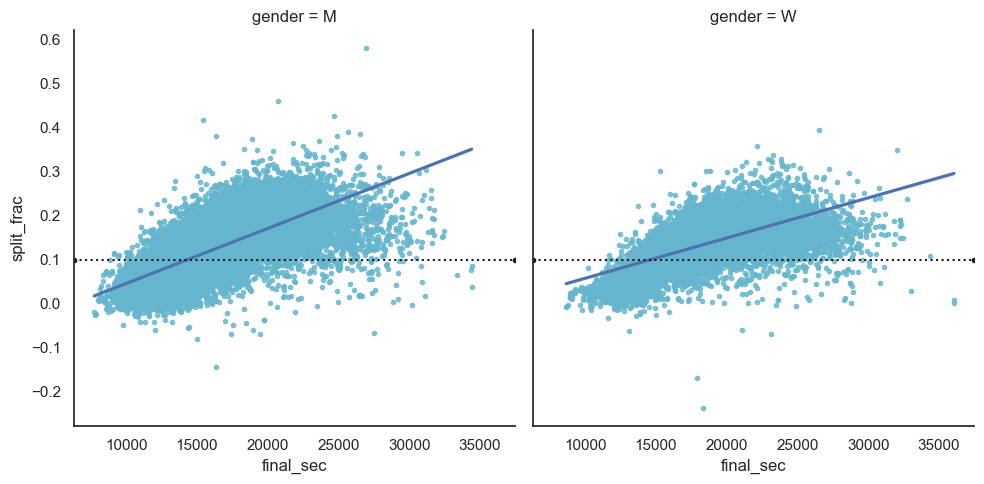

In [53]:
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparemment, les personnes qui réalisent des temps intermédiaires rapides sont les coureurs d'élite qui terminent en moins de 15 000 secondes, soit environ 4 heures. Les personnes plus lentes ont beaucoup moins de chances de réaliser un deuxième temps intermédiaire rapide.

# Références

- JakeVdP https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- Tanner https://gilberttanner.com/blog/introduction-to-data-visualization-inpython